In [1]:
#!pip3 install albumentations

In [2]:
# Initialized Logger
import torch
import torch.optim as optim
from torchvision import datasets
import albumentations as A
from torchsummary import summary
from src.model import Net
from src.utils import get_device, \
                  fit_model, plot_accuracy_report, \
                  show_random_results, plot_misclassified, \
                  calculate_accuracy_per_class
from src.dataset import dataset_stats,\
                        visualize_images,\
                        visualize_augmentated_images,\
                        AlbumentationImageDataset

CODE BLOCK: 2

In [3]:
# CUDA?
device = get_device()
print("Available Device :: ", device)

INFO:src.utils:device: cuda


Available Device ::  cuda


CODE BLOCK: 3

In [4]:
sample = datasets.CIFAR10('./data',train=True,download=True)
sample_data = sample.data

mean,std,var = dataset_stats(sample_data)
print(f"SHAPE of Images {sample_data.shape}")
print(f"MEAN of dataset {mean}")
print(f"STD of dataset {std}")
print(f"VAR of dataset {var}")

Files already downloaded and verified
SHAPE of Images (50000, 32, 32, 3)
MEAN of dataset [0.49139968 0.48215841 0.44653091]
STD of dataset [0.24703223 0.24348513 0.26158784]
VAR of dataset [15.56135559 15.11767693 17.44919073]


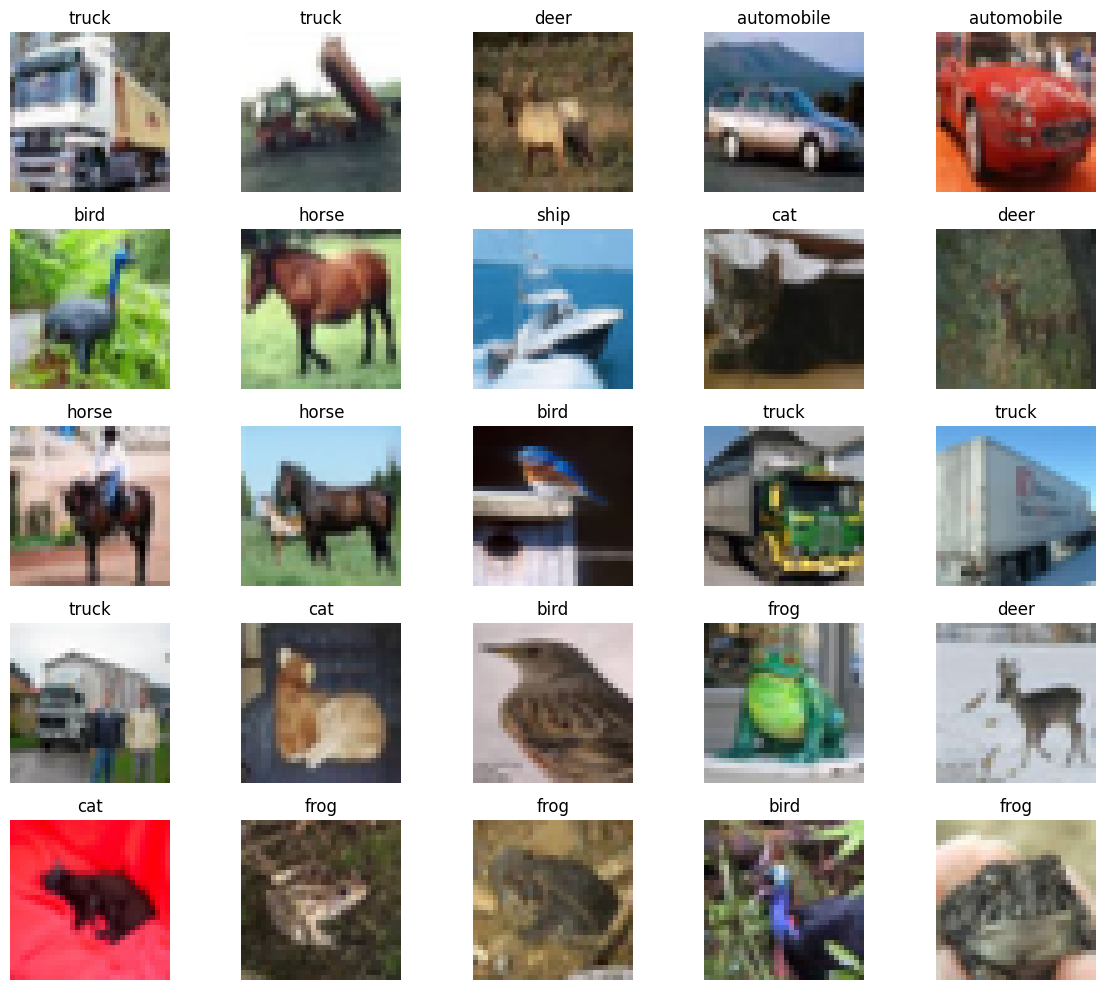

In [5]:
visualize_images(sample,(5,5))

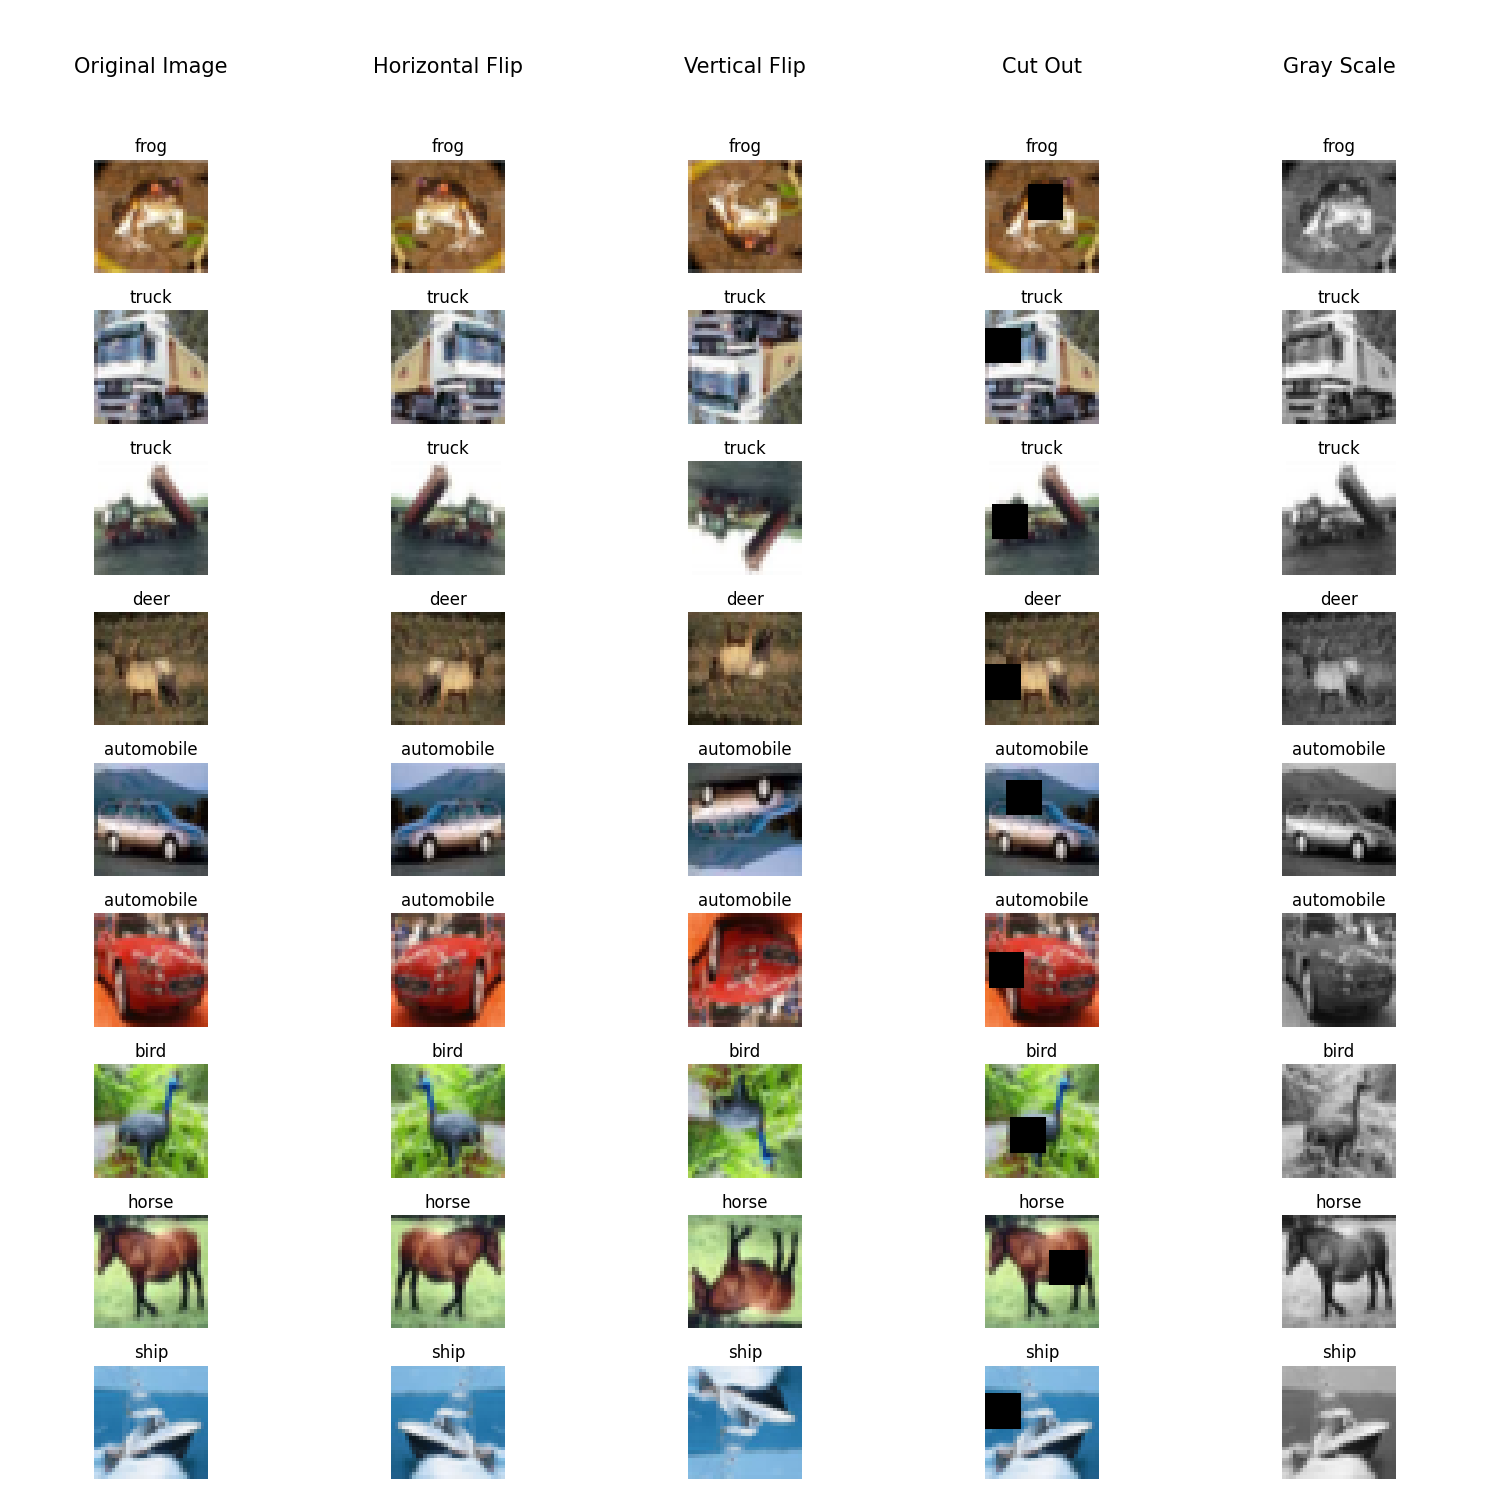

In [6]:
aug_details = {
    'Original Image': None,
    'Horizontal Flip': A.HorizontalFlip(always_apply=True),
    'Vertical Flip': A.VerticalFlip(always_apply=True),
    'Cut Out': A.CoarseDropout(max_holes=1, max_height=10, max_width=10, min_holes=1, min_height=10,
                               min_width=10, fill_value=0.473363, mask_fill_value=None, always_apply=True),
    'Gray Scale': A.ToGray(always_apply=True)
}

visualize_augmentated_images(sample,aug_details)

In [7]:
train_data = datasets.CIFAR10(root='./data', train=True,
                                        download=True )
test_data = datasets.CIFAR10(root='./data', train=False,
                                       download=True)


train_loader = torch.utils.data.DataLoader(AlbumentationImageDataset(train_data,(0.49139968, 0.48215841, 0.44653091),(0.24703223, 0.24348513, 0.26158784),train=True), batch_size=32,
                                          shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(AlbumentationImageDataset(test_data,(0.49139968, 0.48215841, 0.44653091),(0.24703223, 0.24348513, 0.26158784),train=False), batch_size=32,
                                          shuffle=False, num_workers=1)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
model = Net(norm_type="gn").to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 32, 32]             270
              ReLU-2           [-1, 10, 32, 32]               0
         GroupNorm-3           [-1, 10, 32, 32]              20
           Dropout-4           [-1, 10, 32, 32]               0
            Conv2d-5           [-1, 20, 32, 32]           1,800
              ReLU-6           [-1, 20, 32, 32]               0
         GroupNorm-7           [-1, 20, 32, 32]              40
           Dropout-8           [-1, 20, 32, 32]               0
            Conv2d-9           [-1, 10, 34, 34]             200
             ReLU-10           [-1, 10, 34, 34]               0
        GroupNorm-11           [-1, 10, 34, 34]              20
          Dropout-12           [-1, 10, 34, 34]               0
        MaxPool2d-13           [-1, 10, 17, 17]               0
           Conv2d-14           [-1, 18,

In [9]:
training_parameters = {"learning_rate":0.01,
                       "momentum":0.7,
                       "max_lr":0.015,
                       "num_epochs":20
                       }
train_losses, test_losses, train_acc, test_acc = fit_model(model,training_parameters,train_loader,test_loader,device)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 1


Train: Loss=1.7583 Batch_id=1562 Accuracy=28.97: 100%|██████████| 1563/1563 [00:29<00:00, 53.45it/s]


Test set: Average loss: 1.6447, Accuracy: 4180/10000 (41.80%)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 2


Train: Loss=1.1865 Batch_id=1562 Accuracy=39.62: 100%|██████████| 1563/1563 [00:28<00:00, 54.98it/s]


Test set: Average loss: 1.4004, Accuracy: 4936/10000 (49.36%)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 3


Train: Loss=1.3943 Batch_id=1562 Accuracy=44.59: 100%|██████████| 1563/1563 [00:29<00:00, 53.74it/s]


Test set: Average loss: 1.2717, Accuracy: 5489/10000 (54.89%)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 4


Train: Loss=1.3553 Batch_id=1562 Accuracy=47.88: 100%|██████████| 1563/1563 [00:28<00:00, 54.73it/s]


Test set: Average loss: 1.1923, Accuracy: 5779/10000 (57.79%)

Adjusting learning rate of group 0 to 6.0001e-04.
Epoch 5


Train: Loss=1.4380 Batch_id=1562 Accuracy=50.43: 100%|██████████| 1563/1563 [00:28<00:00, 54.12it/s]


Test set: Average loss: 1.1232, Accuracy: 6027/10000 (60.27%)

Adjusting learning rate of group 0 to 6.0001e-04.
Epoch 6


Train: Loss=1.7923 Batch_id=1562 Accuracy=52.41: 100%|██████████| 1563/1563 [00:28<00:00, 55.43it/s]


Test set: Average loss: 1.0958, Accuracy: 6147/10000 (61.47%)

Adjusting learning rate of group 0 to 6.0001e-04.
Epoch 7


Train: Loss=1.4568 Batch_id=1562 Accuracy=53.64: 100%|██████████| 1563/1563 [00:28<00:00, 55.50it/s]


Test set: Average loss: 1.0393, Accuracy: 6334/10000 (63.34%)

Adjusting learning rate of group 0 to 6.0002e-04.
Epoch 8


Train: Loss=1.5308 Batch_id=1562 Accuracy=54.80: 100%|██████████| 1563/1563 [00:28<00:00, 55.06it/s]


Test set: Average loss: 1.0961, Accuracy: 6178/10000 (61.78%)

Adjusting learning rate of group 0 to 6.0003e-04.
Epoch 9


Train: Loss=1.2758 Batch_id=1562 Accuracy=55.52: 100%|██████████| 1563/1563 [00:28<00:00, 55.06it/s]


Test set: Average loss: 0.9849, Accuracy: 6550/10000 (65.50%)

Adjusting learning rate of group 0 to 6.0003e-04.
Epoch 10


Train: Loss=1.2970 Batch_id=1562 Accuracy=56.43: 100%|██████████| 1563/1563 [00:28<00:00, 54.92it/s]


Test set: Average loss: 0.9515, Accuracy: 6713/10000 (67.13%)

Adjusting learning rate of group 0 to 6.0004e-04.
Epoch 11


Train: Loss=0.8085 Batch_id=1562 Accuracy=57.57: 100%|██████████| 1563/1563 [00:28<00:00, 55.16it/s]


Test set: Average loss: 0.9279, Accuracy: 6781/10000 (67.81%)

Adjusting learning rate of group 0 to 6.0005e-04.
Epoch 12


Train: Loss=1.4127 Batch_id=1562 Accuracy=57.63: 100%|██████████| 1563/1563 [00:28<00:00, 54.40it/s]


Test set: Average loss: 0.9315, Accuracy: 6706/10000 (67.06%)

Adjusting learning rate of group 0 to 6.0006e-04.
Epoch 13


Train: Loss=0.9085 Batch_id=1562 Accuracy=58.70: 100%|██████████| 1563/1563 [00:28<00:00, 54.50it/s]


Test set: Average loss: 0.8948, Accuracy: 6931/10000 (69.31%)

Adjusting learning rate of group 0 to 6.0007e-04.
Epoch 14


Train: Loss=0.8098 Batch_id=1562 Accuracy=59.12: 100%|██████████| 1563/1563 [00:28<00:00, 55.25it/s]


Test set: Average loss: 0.8954, Accuracy: 6914/10000 (69.14%)

Adjusting learning rate of group 0 to 6.0008e-04.
Epoch 15


Train: Loss=1.3289 Batch_id=1562 Accuracy=59.58: 100%|██████████| 1563/1563 [00:32<00:00, 47.79it/s]


Test set: Average loss: 0.9220, Accuracy: 6845/10000 (68.45%)

Adjusting learning rate of group 0 to 6.0009e-04.
Epoch 16


Train: Loss=0.9832 Batch_id=1562 Accuracy=59.49: 100%|██████████| 1563/1563 [00:28<00:00, 54.57it/s]


Test set: Average loss: 0.8897, Accuracy: 6913/10000 (69.13%)

Adjusting learning rate of group 0 to 6.0010e-04.
Epoch 17


Train: Loss=1.0049 Batch_id=1562 Accuracy=60.31: 100%|██████████| 1563/1563 [00:29<00:00, 52.63it/s]


Test set: Average loss: 0.8802, Accuracy: 6935/10000 (69.35%)

Adjusting learning rate of group 0 to 6.0012e-04.
Epoch 18


Train: Loss=1.2935 Batch_id=1562 Accuracy=60.64: 100%|██████████| 1563/1563 [00:28<00:00, 54.69it/s]


Test set: Average loss: 0.8614, Accuracy: 6998/10000 (69.98%)

Adjusting learning rate of group 0 to 6.0013e-04.
Epoch 19


Train: Loss=1.4003 Batch_id=1562 Accuracy=60.93: 100%|██████████| 1563/1563 [00:29<00:00, 52.92it/s]


Test set: Average loss: 0.8479, Accuracy: 7063/10000 (70.63%)

Adjusting learning rate of group 0 to 6.0015e-04.
Epoch 20


Train: Loss=1.1270 Batch_id=1562 Accuracy=61.26: 100%|██████████| 1563/1563 [00:28<00:00, 54.15it/s]


Test set: Average loss: 0.8381, Accuracy: 7123/10000 (71.23%)

Adjusting learning rate of group 0 to 6.0016e-04.


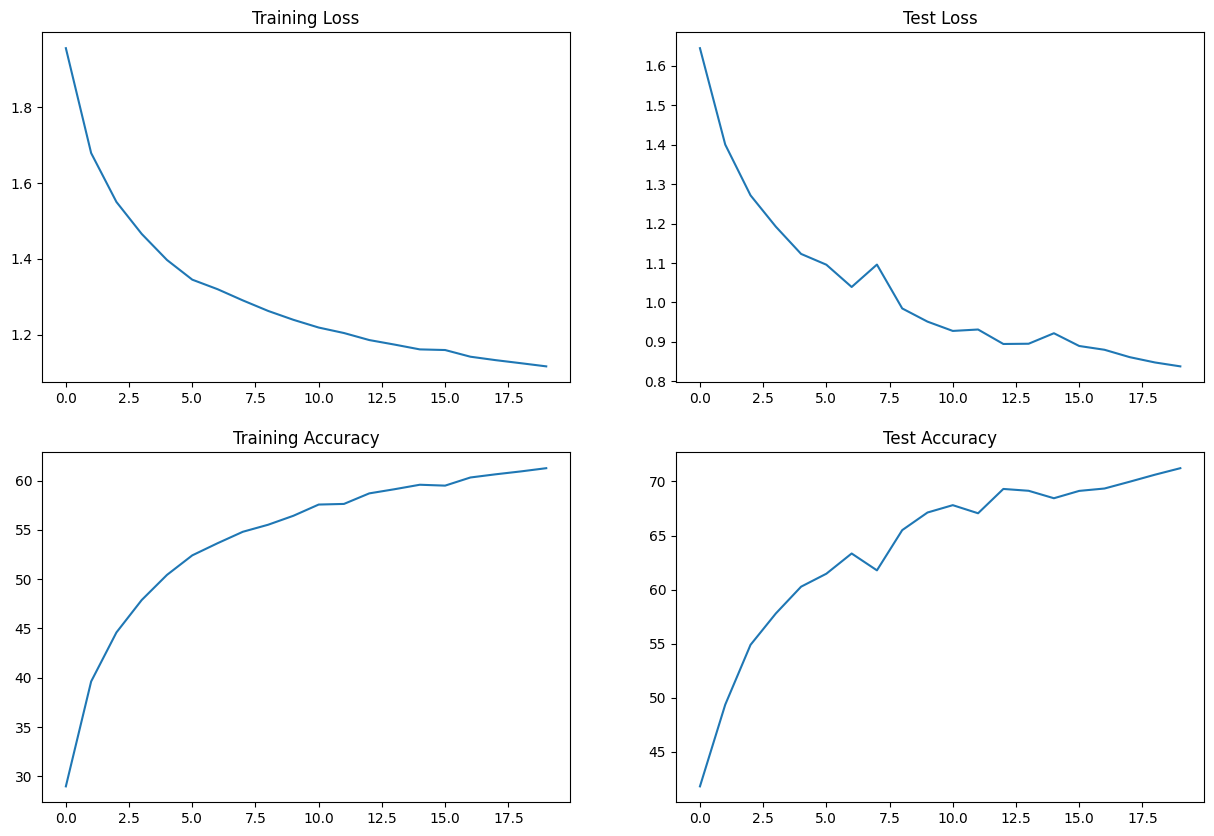

In [10]:
plot_accuracy_report(train_losses, test_losses, train_acc, test_acc)

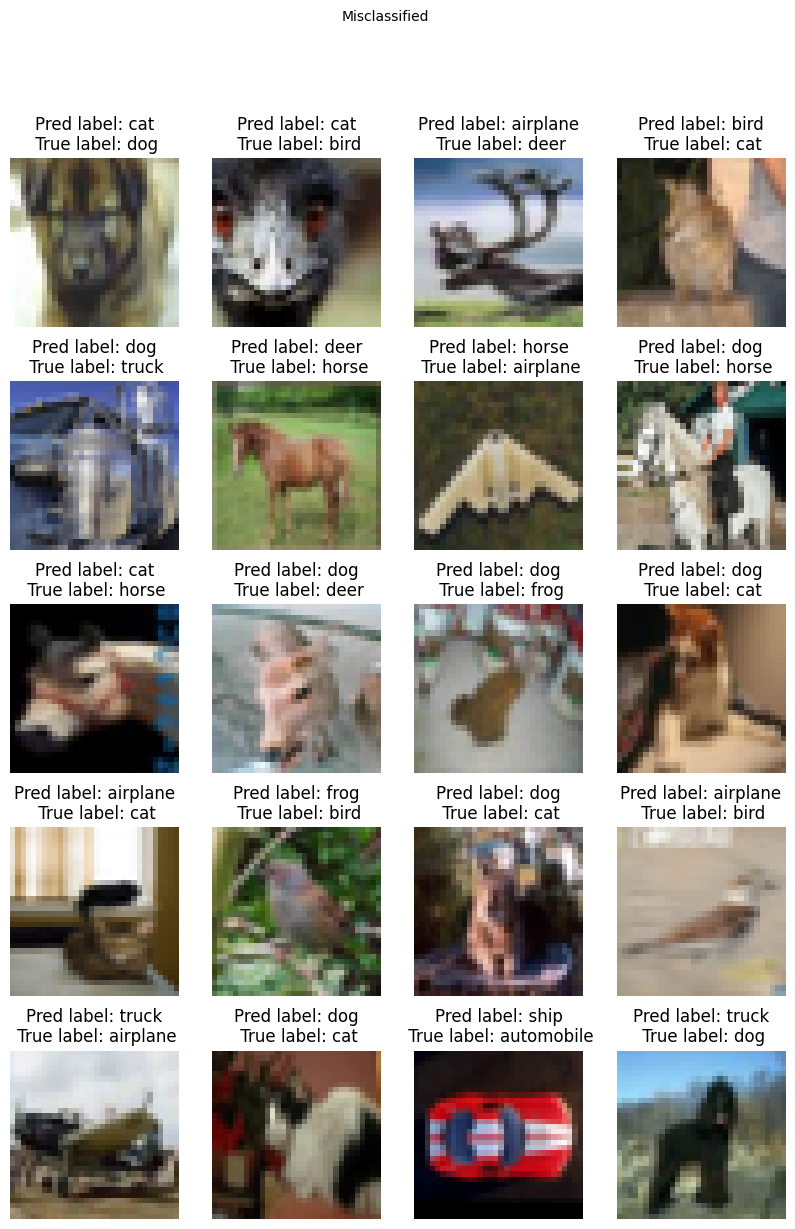

In [11]:
# from torchvision import transforms
# import matplotlib.pyplot as plt
# import numpy as np

grid_size = (4,4)
plot_misclassified(model,test_loader,test_data,device,mean,std)


Accuracy of airplane : 80 %

Accuracy of automobile : 86 %

Accuracy of  bird : 48 %

Accuracy of   cat : 38 %

Accuracy of  deer : 71 %

Accuracy of   dog : 78 %

Accuracy of  frog : 67 %

Accuracy of horse : 75 %

Accuracy of  ship : 78 %

Accuracy of truck : 86 %
{'airplane': 80.79470198675497, 'automobile': 86.2876254180602, 'bird': 48.214285714285715, 'cat': 38.311688311688314, 'deer': 71.65109034267913, 'dog': 78.27476038338658, 'frog': 67.4342105263158, 'horse': 75.96153846153847, 'ship': 78.0952380952381, 'truck': 86.5625}


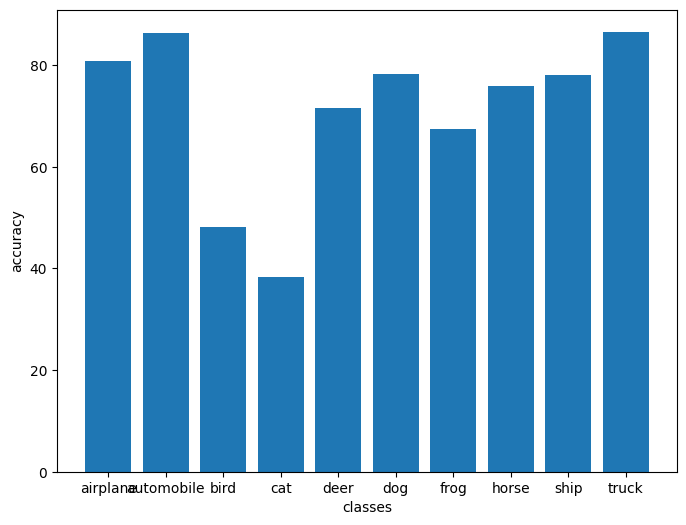

In [12]:
calculate_accuracy_per_class(model,device,test_loader,test_data)